### Problem statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there 
and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Based on various market surveys,the consulting firm has gathered a large dataset of different types of cars across the Americal market. 
    
    

### Solution :
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for
management to understand the pricing dynamics of a new market. 
    

# Lets Start

Steps to follow
1. Understanding the data
   - Loading the data , Checking shape , checking datatype, checking correlation e.t.c
2. Data Preparation
   - Data correction (spellings of catogical data), Missing value imputation, Outlier treatment , Dummy variables
3. Divide the data in Train and test 
4. Rescaling the train feature
   - Dividing into X and Y sets for the model building
5. Building model using RFE (Recursive feature elemination)
6. Building model using statsmodel, for the detailed statistics
   - Removing feature which are not significate for model 
7. Residual Analysis of train dataset
8. Making prediction on test dataset
9. Model Evalution

## Step 1 : Understanding the data

In [1]:
import pandas as pd # Pandas help us to insert csv and other formated file .. and we have to perform several operation as well.
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv(r'D:\STUDY\Github ML Content\SVM\CarPrice_Assignment.csv')# File is inserted
dataframe.head(10) #print dataset upto 10 rows 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Lets do analysis to understand the dataset

In [3]:
# get all the column name 
columns_name = dataframe.columns
print("Display all column in dataset :",columns_name)
print("----------------------------------------------------------------------------")
print("Count of column in dataset",len(columns_name))

Display all column in dataset : Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
----------------------------------------------------------------------------
Count of column in dataset 26


In [4]:
# checking the size of rows and column in data_set
dataframe.shape

(205, 26)

Number of rows are 205 (header is not include) and number of column are 26

In [5]:
# checking the data type of all column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# checking the mean,standard deviation,max value and min value , column of rows , percentile of each column
dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# checking the correlation between each feature
dataframe.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [8]:
# lets create a heatmap to understand the correlationship between each feature by visualization
# importing packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# checking the correlation between each feature
corr = dataframe.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 10))
# Creating heatmap
sns.heatmap(corr)


In the above figure of heatmap, light colur reflect less correlation between the feature and the dark the reflect high correlation 


In [9]:
# Checking catogical column data quality, misspelled entires
print("Drivewheel column",dataframe.drivewheel.unique())

Drivewheel column ['rwd' 'fwd' '4wd']


## Step 2 : Data Preparation

In [10]:
# Droping column which is insignificat to model
dataframe = dataframe.drop('car_ID',axis=1)

In [11]:
#Lets clean and correct the miss-spell data 
dataframe[['drivewheel']] = dataframe[['drivewheel']].replace('4wd','fwd')
dataframe[['drivewheel']] = dataframe[['drivewheel']].replace('fwd','drivewheel_fwd')
dataframe[['drivewheel']] = dataframe[['drivewheel']].replace('rwd','drivewheel_rwd')
dataframe[['enginelocation']] = dataframe[['enginelocation']].replace('front','enginelocation_front')
dataframe[['enginelocation']] = dataframe[['enginelocation']].replace('rear','enginelocation_rear')
dataframe[['doornumber']] = dataframe[['doornumber']].replace('two',2)
dataframe[['doornumber']] = dataframe[['doornumber']].replace('four',4)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('two',2)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('three',3)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('four',4)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('five',5)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('six',6)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('eight',7)
dataframe[['cylindernumber']] = dataframe[['cylindernumber']].replace('twelve',8)
dataframe.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,drivewheel_rwd,enginelocation_front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,drivewheel_fwd,enginelocation_front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,drivewheel_fwd,enginelocation_front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# Divide car company_name and Car model_name from CarName coloumn
dataframe[['Car_company','Car_model']] = dataframe.CarName.str.split(n=1,expand = True)
dataframe = dataframe.drop('CarName',axis =1)
dataframe.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_company,Car_model
0,3,gas,std,2,convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,drivewheel_rwd,enginelocation_front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,drivewheel_rwd,enginelocation_front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,4,sedan,drivewheel_fwd,enginelocation_front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,drivewheel_fwd,enginelocation_front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [13]:
# Counting the car companys in dataset
dataframe.Car_company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
porcshce        1
vokswagen       1
toyouta         1
Nissan          1
mercury         1
Name: Car_company, dtype: int64

In [14]:
# Checking missing percentage in each column.
dataframe.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Car_company         0
Car_model           2
dtype: int64

In [15]:
dataframe_2  = dataframe

In [16]:
# As we know there are missing value in Car_model column 
# we can treate the missing or remove the missing
# here we are droping the missing value row because of less number of missing
dataframe_2 = dataframe_2.dropna(how = 'any') 
dataframe_2.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Car_company         0
Car_model           0
dtype: int64

In [17]:
dataframe_2.shape

(203, 26)

In [18]:
# Create a list of numerical column and categorical column for feather process
catogical_df = dataframe.dtypes[dataframe.dtypes == np.object]
listOfCatColumns = list(catogical_df.index)
print("Categorical column :",listOfCatColumns)

Categorical column : ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Car_company', 'Car_model']


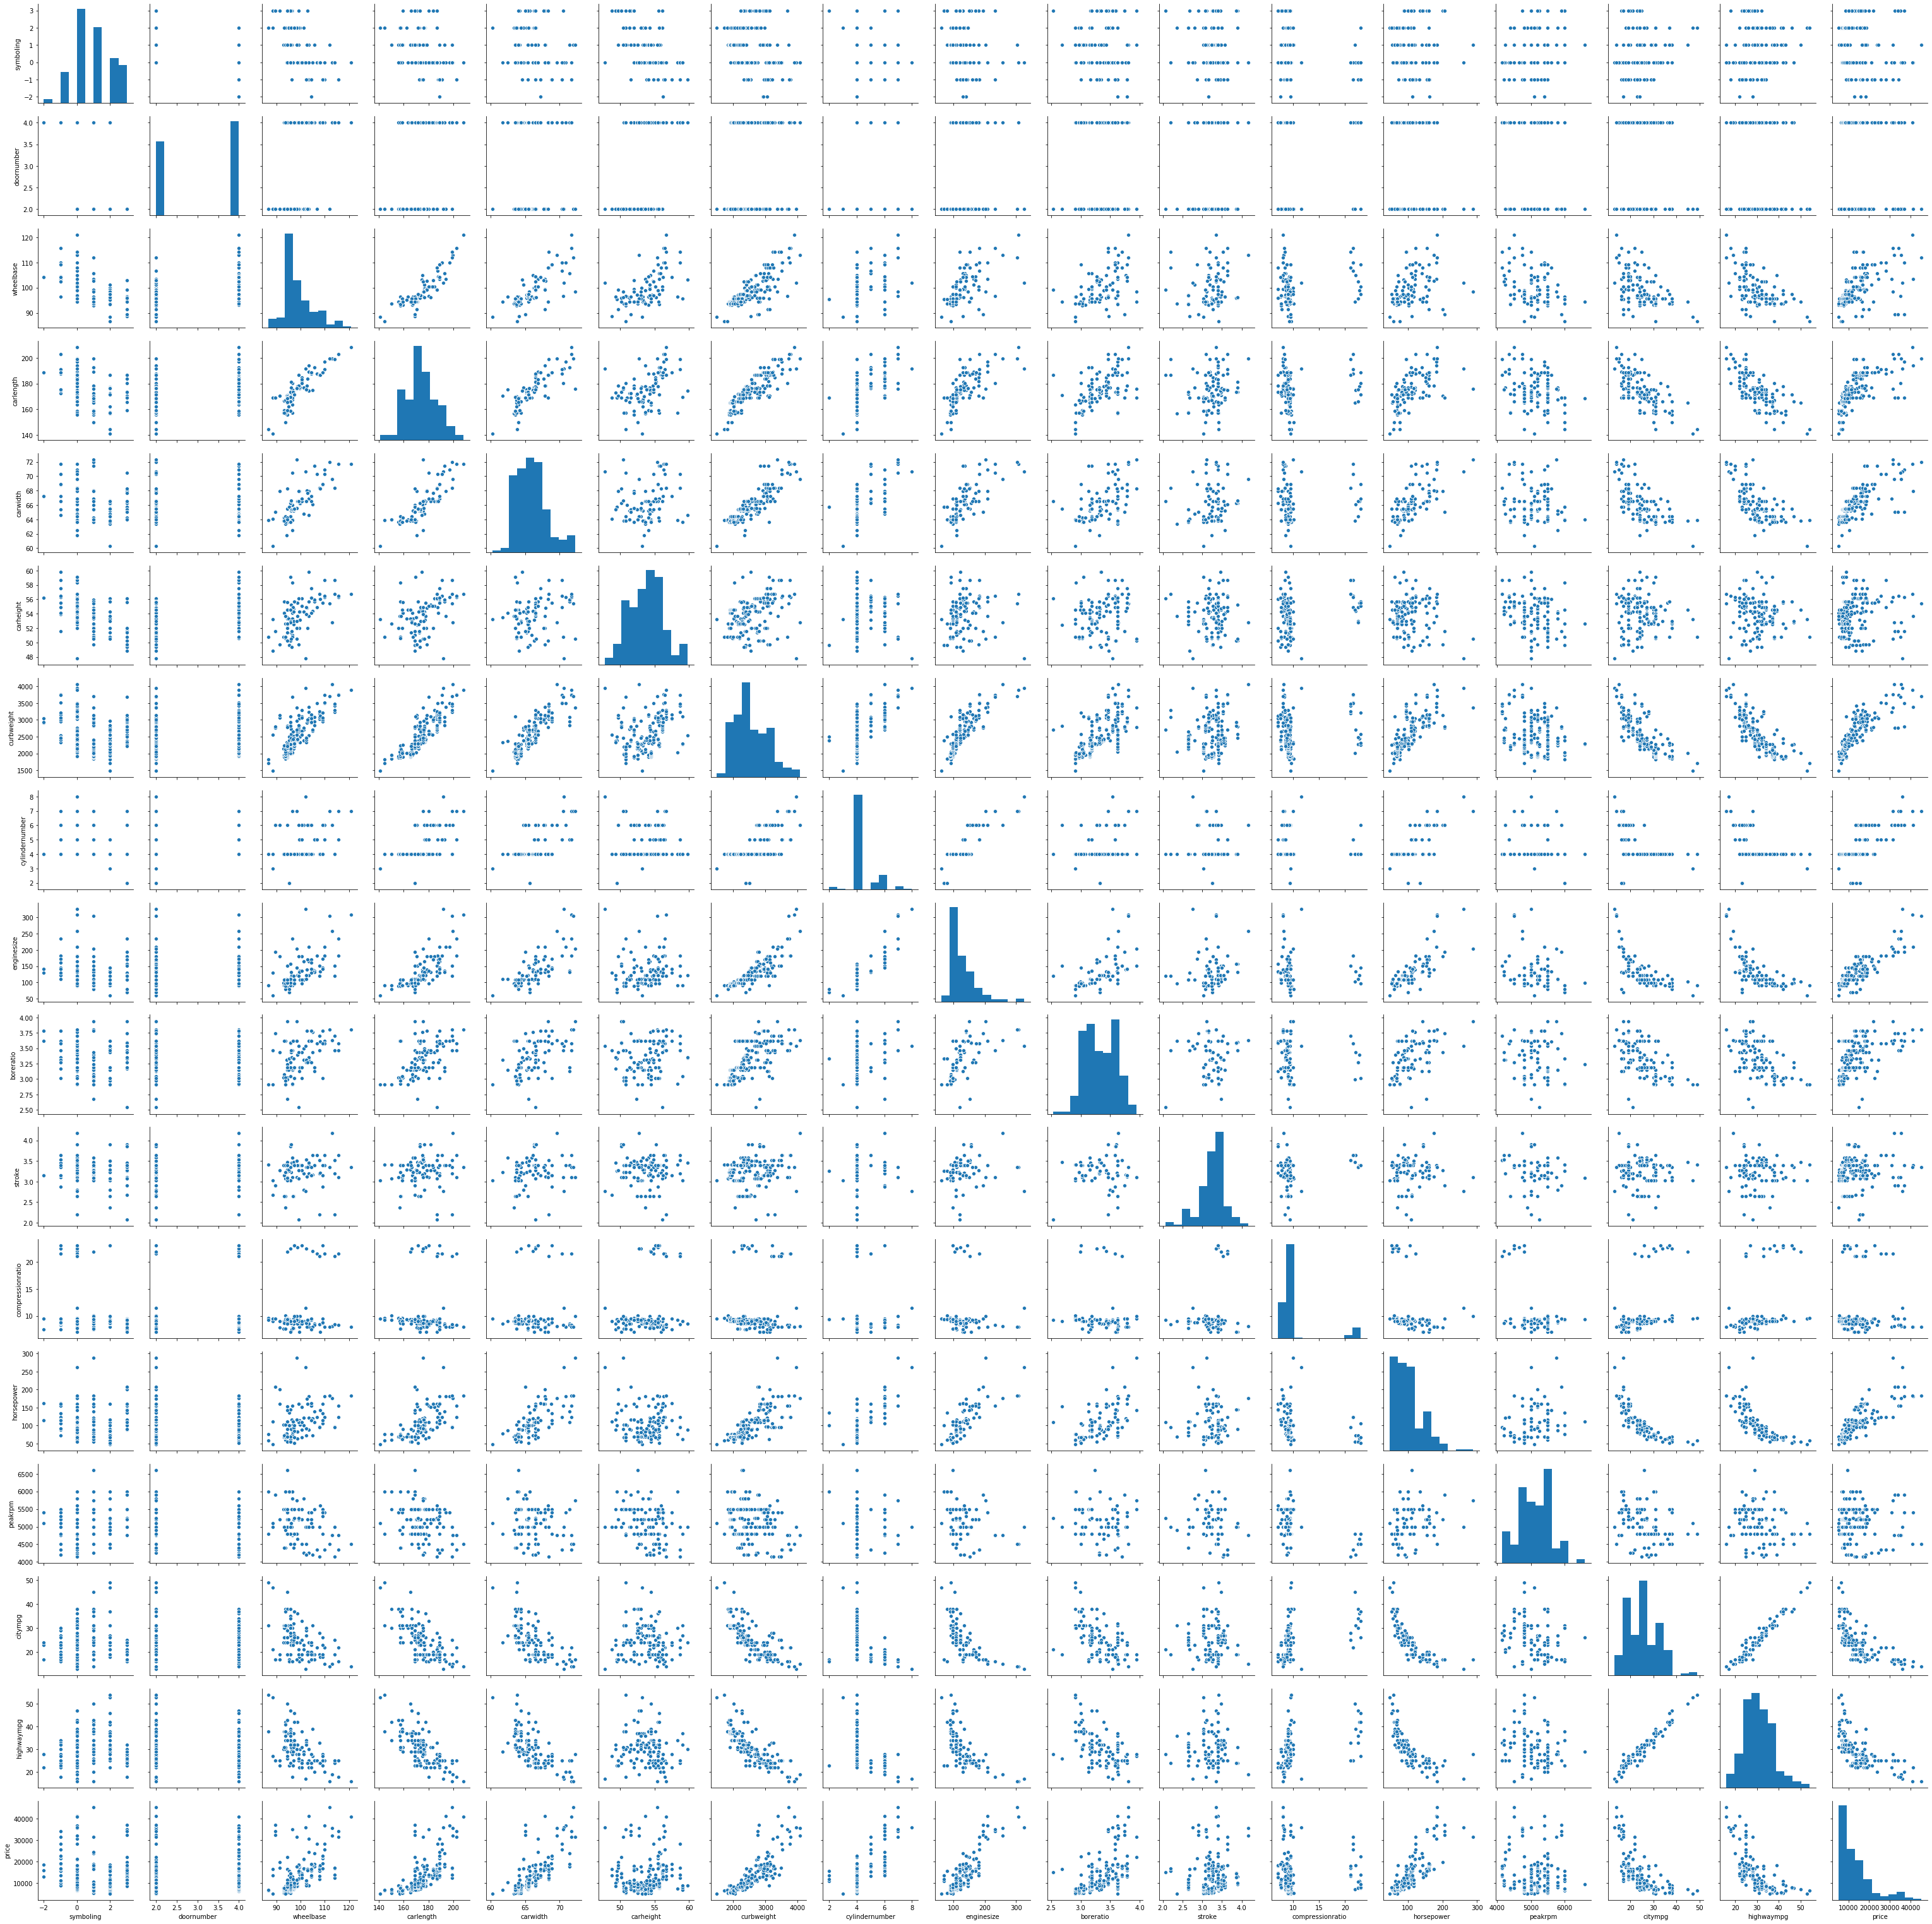

In [19]:
## visualize Numerical column with scatter chart 
sns.pairplot(dataframe)
plt.show()

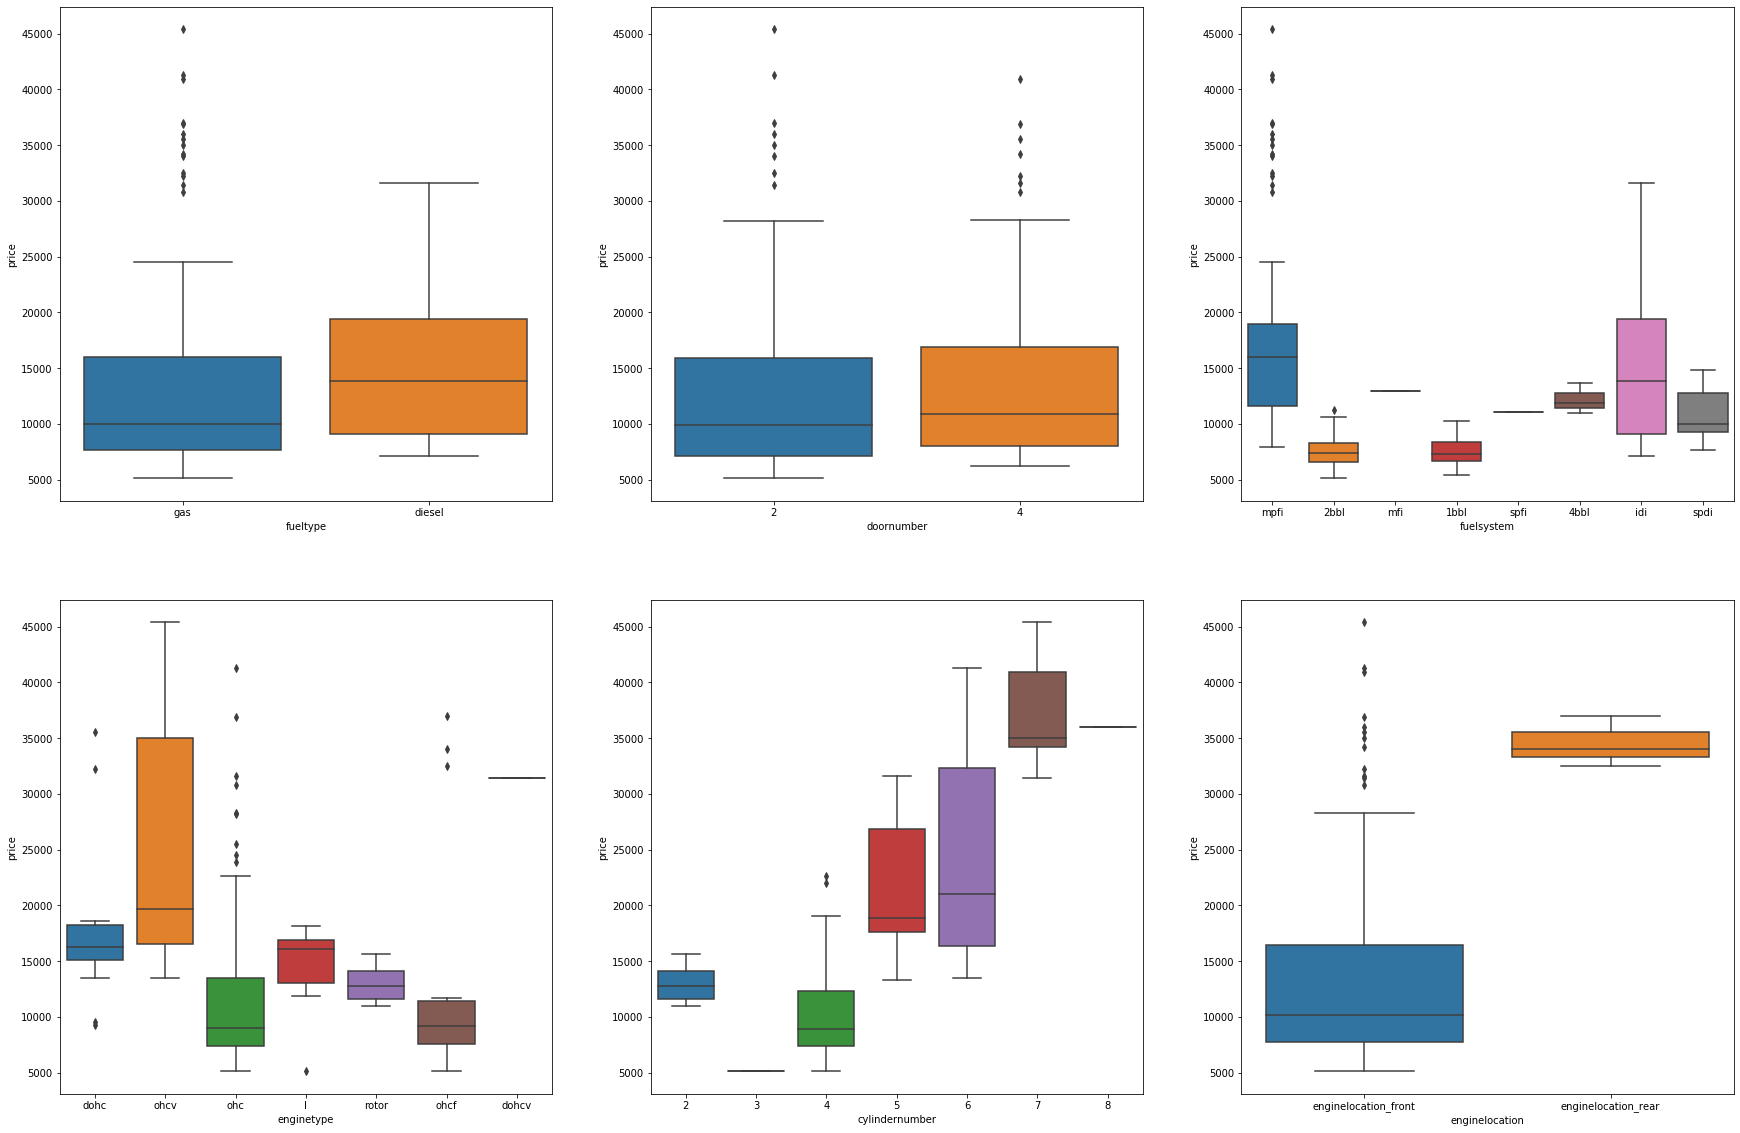

In [20]:
## Visualization on catogical charts
# Visualize the Some of the cataogical variable

plt.figure(figsize = (30,20))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype',y='price',data=dataframe)
plt.subplot(2,3,2)
sns.boxplot(x='doornumber',y='price',data=dataframe)
plt.subplot(2,3,3)
sns.boxplot(x='fuelsystem',y='price',data=dataframe)
plt.subplot(2,3,4)
sns.boxplot(x='enginetype',y='price',data=dataframe)
plt.subplot(2,3,5)
sns.boxplot(x='cylindernumber',y='price',data=dataframe)
plt.subplot(2,3,6)
sns.boxplot(x='enginelocation',y='price',data=dataframe)


In [21]:
# create dummy variable of categorical value because linear regression only work on numerical variable
for catcolumn in listOfCatColumns:
    df = pd.get_dummies(dataframe[catcolumn])
    dataframe = pd.concat([dataframe,df],axis =1)
    dataframe = dataframe.drop(catcolumn,axis=1)
dataframe.head(5)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,vega 2300,versa,x1,x3,x4,x5,xf,xj,xk,z4
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# get all the column name 
columns_name = dataframe.columns
print("Display all column in dataset :",columns_name)
print("----------------------------------------------------------------------------")
print("Count of column in dataset",len(columns_name))

Display all column in dataset : Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       ...
       'vega 2300', 'versa', 'x1', 'x3', 'x4', 'x5', 'xf', 'xj', 'xk', 'z4'],
      dtype='object', length=214)
----------------------------------------------------------------------------
Count of column in dataset 214


In [23]:
## Step 3 : Divide the data in Train and test
from sklearn.model_selection import train_test_split #importing package

df_train,df_test = train_test_split(dataframe,train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 214)
(62, 214)


In [24]:
## Step 4: Rescaling
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
columns = dataframe.columns
# fit on data 
df_train[columns] = Scaler.fit_transform(df_train[columns])
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,vega 2300,versa,x1,x3,x4,x5,xf,xj,xk,z4
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.333333,0.139623,0.230159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.333333,0.339623,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.333333,0.139623,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.333333,0.260377,0.626984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.333333,0.260377,0.746032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Dividing into X and Y sets for the model building
Y_train = df_train.pop('price')
X_train = df_train

## Step 4 : Building model using RFE (Recursive feature elemination)

In [26]:
# importing RFE and linear regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # creating model object

rfe = RFE(lr,15) # find the best ten feature for linear regression model 
rfe = rfe.fit(X_train,Y_train) #pass the train dataset to find the best 10 feature

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 73),
 ('doornumber', False, 74),
 ('wheelbase', False, 10),
 ('carlength', False, 55),
 ('carwidth', True, 1),
 ('carheight', False, 143),
 ('curbweight', False, 137),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 25),
 ('horsepower', True, 1),
 ('peakrpm', False, 135),
 ('citympg', False, 108),
 ('highwaympg', False, 50),
 ('diesel', False, 28),
 ('gas', False, 8),
 ('std', False, 86),
 ('turbo', False, 75),
 ('convertible', False, 101),
 ('hardtop', False, 130),
 ('hatchback', False, 163),
 ('sedan', False, 139),
 ('wagon', False, 122),
 ('drivewheel_fwd', False, 27),
 ('drivewheel_rwd', False, 32),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('dohc', False, 165),
 ('dohcv', False, 16),
 ('l', False, 35),
 ('ohc', False, 109),
 ('ohcf', False, 23),
 ('ohcv', False, 110),
 ('rotor', False, 29),
 ('1bbl', False, 83),
 ('2bbl', False, 151),
 ('4bbl', Fa

In [28]:
rfe_columns = X_train.columns[rfe.support_]  # Creating list to find the column name selected by rfe
print(rfe_columns) 

Index(['carwidth', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'enginelocation_front', 'enginelocation_rear', 'bmw',
       'buick', '264gl', 'stelvio', 'x5', 'xf', 'xj'],
      dtype='object')


In [29]:
columns = X_train.columns[~rfe.support_]
print(columns)

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'curbweight', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       ...
       'tribeca', 'type 3', 'valiant', 'vega 2300', 'versa', 'x1', 'x3', 'x4',
       'xk', 'z4'],
      dtype='object', length=198)


## Step 6 : Building model using statsmodel, for the detailed statistics

In [30]:
X_train_rfe = X_train[rfe_columns]
# formula => y = ax+b

#importing statsmodel
import statsmodels.api as sm

#Adding constant 
X_train_rfe = sm.add_constant(X_train_rfe)

# fitting the rfe_dateset to sm model
lr = sm.OLS(Y_train,X_train_rfe).fit() 

# Lets check the summary of statsmodel
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           9.06e-74
Time:                        10:01:25   Log-Likelihood:                 225.36
No. Observations:                 143   AIC:                            -420.7
Df Residuals:                     128   BIC:                            -376.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1779 

In [31]:
### p-value of the feature are not high so checking vif for model
# importing packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe

vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in  range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],1)
vif = vif.sort_values(by = 'VIF',ascending = False)

vif

,Feature,VIF
7,enginelocation_front,inf
8,enginelocation_rear,inf
3,enginesize,17.6
2,cylindernumber,9.2
4,boreratio,4.2
6,horsepower,4.0
1,carwidth,3.7
5,stroke,2.0
10,buick,1.5
9,bmw,1.4


Note : "enginelocation_front" is showing high corrlation with another feature so we can drop this feature.. 

In [32]:
X_train_rfe = X_train_rfe.drop(['enginelocation_front'],axis =1)
ls = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     159.5
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           9.06e-74
Time:                        10:01:25   Log-Likelihood:                 225.36
No. Observations:                 143   AIC:                            -420.7
Df Residuals:                     128   BIC:                            -376.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0405    

In [33]:
vif = pd.DataFrame()
X = X_train_rfe

vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in  range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],1)
vif = vif.sort_values(by = 'VIF',ascending = False)

vif

,Feature,VIF
0,const,88.2
3,enginesize,17.6
2,cylindernumber,9.2
4,boreratio,4.2
6,horsepower,4.0
1,carwidth,3.7
5,stroke,2.0
9,buick,1.5
8,bmw,1.4
13,xf,1.3


Note : "enginesize" is showing high corrlation with another feature so we can drop this feature.. taking threhold value as 5.0

In [34]:
X_train_rfe = X_train_rfe.drop(['enginesize'],axis =1)
ls = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     146.3
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           1.74e-70
Time:                        10:01:25   Log-Likelihood:                 214.04
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     129   BIC:                            -358.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0975    

In [35]:
X_train_rfe.columns

Index(['const', 'carwidth', 'cylindernumber', 'boreratio', 'stroke',
       'horsepower', 'enginelocation_rear', 'bmw', 'buick', '264gl', 'stelvio',
       'x5', 'xf', 'xj'],
      dtype='object')

In [36]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_train_new

,carwidth,cylindernumber,boreratio,stroke,horsepower,enginelocation_rear,bmw,buick,264gl,stelvio,x5,xf,xj
122,0.291667,0.333333,0.230159,0.525253,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.666667,0.333333,1.000000,0.464646,0.395833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.308333,0.333333,0.444444,0.449495,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.316667,0.333333,0.626984,0.247475,0.262500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,0.575000,0.333333,0.746032,0.484848,0.475000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.333333,0.388889,0.641414,0.283333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.516667,0.666667,0.595238,0.545455,0.433333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.833333,0.500000,0.714286,0.732323,0.312500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24,0.291667,0.333333,0.230159,0.525253,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
Y_train_price = lm.predict(X_train_rfe)

## Step 7 : Residual Analysis of the train data

Text(0.5, 0, 'Errors')

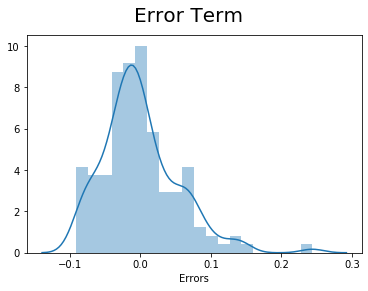

In [38]:
# Plotting Histogram of error terms
Y_train_price = lm.predict(X_train_rfe)
%matplotlib inline
fig = plt.figure()
sns.distplot((Y_train - Y_train_price ),bins = 20)
fig.suptitle('Error Term', fontsize = 20)
plt.xlabel('Errors',fontsize = 10)

## Step 10 : Making Predictions

In [39]:
columns = dataframe.columns
df_test[columns] = Scaler.transform(df_test[columns])

Dividing into X_test and Y_test

In [40]:
Y_test = df_test.pop('price')
X_test = df_test


In [41]:
# Now Lets use model to make predictions
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [42]:
# Making Prediction
y_pred = lm.predict(X_test_new)

## Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

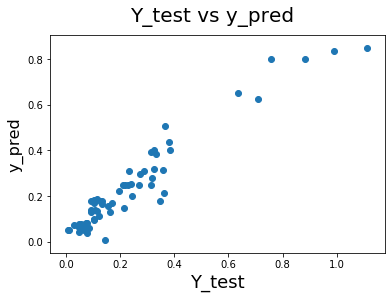

In [43]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('Y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [44]:
from sklearn.metrics import r2_score
print("r2_score is :",r2_score(y_true= Y_test,y_pred =y_pred ))

r2_score is : 0.9130147001129313


In [45]:
print("R-squared is : 0.936") # as per the final model
print("Adj. R-squared:  0.930")# as per the final model

R-squared is : 0.936
Adj. R-squared:  0.930
